In [1]:
import matplotlib.animation
import numpy as np
import matplotlib.pyplot as plt

from jansen_linkage import jansenLinkage
from tom_utils import Point, fourBar
from tom_utils import freudenstein_method, burmester_method

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.constrained_layout.use'] = True
plt.ioff()
%matplotlib inline

## TODO
- automate checking for dyad synthesis
- automate checking 4 bar synthesis (finding correct mode)
- check coupler curve with input data (order, accuracy)

## Given

In [2]:
crank_angles = np.array([250, 0, 120, 190])*np.pi/180

ri = np.array([[-4.763927100569691, -18.123418117808278],
 [-0.6999956389670615, -19.961013594986703],
 [4.881337916779687, -17.44040557352652],
 [1.399683861011356, -12.935082912734538]])

abs_gam6 = np.array([4.769949016493069, 4.631518937798824, -7.19616464830725, -7.0167275046072834])

delta = ri[1:]-ri[0]
gam6 = abs_gam6[1:] - abs_gam6[0]

## Free Choices

In [3]:
# 4 positions of z33
len_z33 = 10.2
ang_z33 = np.array([146.6072908300414, 141.64471403500653, 179.9365339487032, 179.58520377847367])*np.pi/180

# one of tht4, tht5 (directly calculated as intersection of m curves)
# chosen solution from the plot (intersection of m curves)
tht5 = 39.254211348867244*np.pi/180
mode5 = 0

tht4 = 33.53132133660198*np.pi/180
mode4 = 0

# tht7, tht2, calculated simultaneously

# chosen
tht7 = 18.14972802096951*np.pi/180
mode7 = 1

tht2 = 10.194867276277037*np.pi/180
mode2 = 0


pos_z33 = []
for tht in ang_z33:
    pos_z33.append([len_z33*np.cos(tht), len_z33*np.sin(tht)])

pos_z33 = np.array(pos_z33)
z33i = pos_z33[0]


## Dyad Synthesis

- z5, z62 are synthesized for some tht4
- (z33), z4, z63 are synthesized for some tht5
- tht4 and tht5 are adjusted such that their circle points (m point) is same

0.685115233311458 0 0.5852319598679303 0 0.24657625208889486
0.685115233311458 0 0.5852319598679303 0 0.2092183356064115
0.685115233311458 0 0.5852319598679303 0 0.19126232327124013
0.685115233311458 0 0.5852319598679303 0 0.22910765975592867
0.685115233311458 0 0.5852319598679303 0 0.19164722226352257
0.685115233311458 0 0.5852319598679303 0 0.161260203827125
0.685115233311458 0 0.5852319598679303 0 0.20572262280447998
0.685115233311458 0 0.5852319598679303 0 0.10438064950448674
0.685115233311458 0 0.5852319598679303 0 0.22786324017805873
0.685115233311458 0 0.5852319598679303 0 0.0675039348463683
0.685115233311458 0 0.5852319598679303 0 0.2538325899329046
0.685115233311458 0 0.5852319598679303 0 0.07043782038917963
0.685115233311458 0 0.5852319598679303 0 0.2810896203646717
0.685115233311458 0 0.5852319598679303 0 0.10259399042570218
0.685115233311458 0 0.5852319598679303 0 0.2762418082454059
0.685115233311458 0 0.5852319598679303 0 0.1414497948343573
0.685115233311458 0 0.5852319598

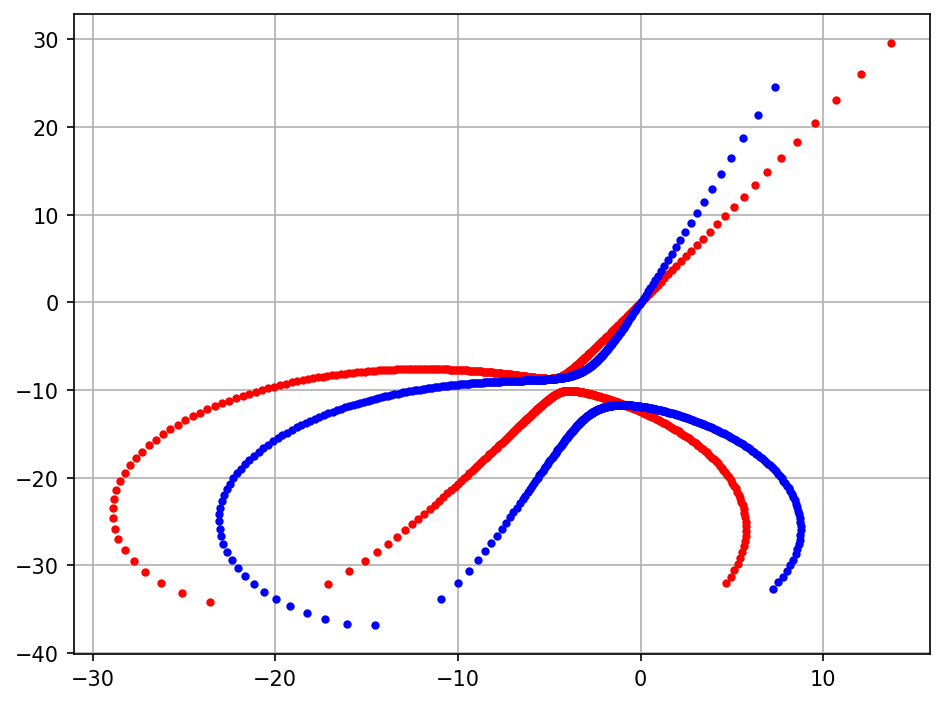

In [4]:
triad_delta = np.array([delta[0] - (pos_z33[1]-pos_z33[0]),
                        delta[1] - (pos_z33[2]-pos_z33[0]),
                        delta[2] - (pos_z33[3]-pos_z33[0])])

plt.grid("on")

m5_circ = []
m4_circ = []

for mode in range(2):
    for tht in range(10,350):
    
        z5i, z62i, gam5 = burmester_method(gam6, delta, (tht)*np.pi/180, mode=mode)
        m5 = ri[0]-z62i-z5i
        m5_circ.append([m5,tht, mode])
        
        plt.plot(m5[0], m5[1], ".r")
        

for mode in range(2):
    for tht in range(10,350):
    
        z4i, z63i, gam4 = burmester_method(gam6, triad_delta, (tht)*np.pi/180, mode=mode)
        m4 = ri[0]-z63i-z4i-pos_z33[0]
        m4_circ.append([m4,tht, mode])
        
        plt.plot(m4[0], m4[1], ".b")

dist = 1e17

for p5 in m5_circ:
    for p4 in m4_circ:

        cur_dist = np.linalg.norm(p5[0]-p4[0])

        if(cur_dist<0.3):
            print(tht5, p5[2], tht4, p4[2], cur_dist)

## Computation of links using feasible solutions (tht5, tht4)
z5i, z62i, gam5 = burmester_method(gam6, delta, tht5, mode=mode5)
z4i, z63i, gam4 = burmester_method(gam6, triad_delta, tht4, mode=mode4)

## Check Dyad synthesis

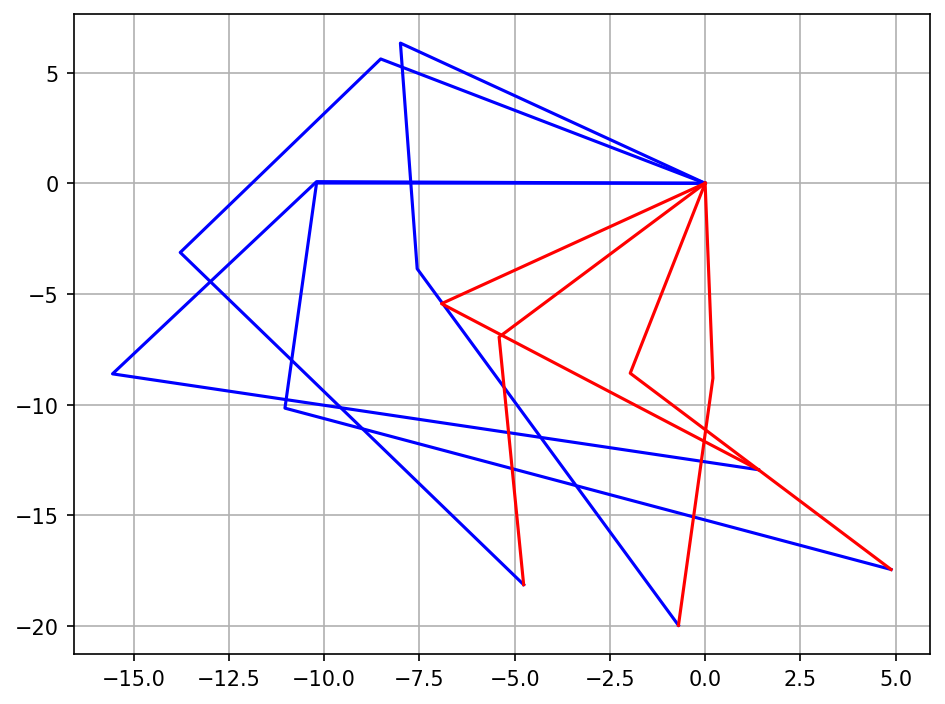

In [5]:
plt.grid("on")
for i, rii in enumerate(ri):
    z4t = z4i
    z63t = z63i

    if(i!=0):
        z4t = z4i@np.array([[np.cos(gam4[i-1]), np.sin(gam4[i-1])],
                           [-np.sin(gam4[i-1]), np.cos(gam4[i-1])]])
        
        z63t = z63i@np.array([[np.cos(gam6[i-1]), np.sin(gam6[i-1])],
                            [-np.sin(gam6[i-1]), np.cos(gam6[i-1])]])
        
    plt.plot([0,pos_z33[i,0], pos_z33[i,0]+z4t[0], pos_z33[i,0]+z4t[0]+z63t[0]], 
             [0,pos_z33[i,1], pos_z33[i,1]+z4t[1], pos_z33[i,1]+z4t[1]+z63t[1]], "b")


for i, rii in enumerate(ri):
    z5t = z5i
    z62t = z62i

    if(i!=0):
        z5t = z5i@np.array([[np.cos(gam5[i-1]), np.sin(gam5[i-1])],
                           [-np.sin(gam5[i-1]), np.cos(gam5[i-1])]])
        
        z62t = z62i@np.array([[np.cos(gam6[i-1]), np.sin(gam6[i-1])],
                            [-np.sin(gam6[i-1]), np.cos(gam6[i-1])]])
        
    plt.plot([0, z5t[0], z5t[0]+z62t[0]], 
             [0, z5t[1], z5t[1]+z62t[1]], "r")



## Two 4 Bar synthesis for prescribed timing of the linkage (4 position)

In [6]:
# First Four bar
delta5 = []
for i in range(len(gam5)):

    z5t = z5i@np.array([[np.cos(gam5[i]), np.sin(gam5[i])],
                       [-np.sin(gam5[i]), np.cos(gam5[i])]])
    delta5.append(z5t-z5i)

delta5 = np.array(delta5)
gam1 = crank_angles[1:]-crank_angles[0]

dist = 1e17

t7_arr = np.linspace(5, 60, 350)
t2_arr = np.linspace(5, 60, 350) 

for t7 in t7_arr:

    neg_z7i, z1i, gam7 = burmester_method(gam1, delta5, t7*np.pi/180, mode=1, debug=False)
    z7i = -neg_z7i
    
    # Second Four bar
    delta1 = []
    for i in range(len(gam1)):
        z1t = z1i@np.array([[np.cos(gam1[i]), np.sin(gam1[i])],
                           [-np.sin(gam1[i]), np.cos(gam1[i])]])
        delta1.append(z1t-z1i)
    
    delta1 = np.array(delta1)
    gam3 = ang_z33[1:]-ang_z33[0]

    m7 = z5i + z7i - z1i
    
    for t2 in t2_arr:
        
        z2i, z31i, gam2 = burmester_method(gam3, delta1, t2*np.pi/180, mode=0, debug=False)
        m2 = z31i + z2i - z1i
        
        if(np.linalg.norm(m7-m2)<dist):
            dist = np.linalg.norm(m7-m2)

        if(np.linalg.norm(m7-m2)<2):
            print(t2, t7, np.linalg.norm(m7-m2))

print(dist)

## Computation of links using feasible solutions (tht7, tht2)

neg_z7i, z1i, gam7 = burmester_method(gam1, delta5, tht7, mode=mode7, debug=False)
z7i = -neg_z7i

# Second Four bar
delta1 = []
for i in range(len(gam1)):
    z1t = z1i@np.array([[np.cos(gam1[i]), np.sin(gam1[i])],
                       [-np.sin(gam1[i]), np.cos(gam1[i])]])
    delta1.append(z1t-z1i)

delta1 = np.array(delta1)
gam3 = ang_z33[1:]-ang_z33[0]

z2i, z31i, gam2 = burmester_method(gam3, delta1, tht2, mode=mode2, debug=False)

print(np.linalg.norm(z5i+z7i-z31i-z2i))

8.151862464183381 16.66189111747851 1.9692332237125074
8.30945558739255 16.66189111747851 1.9205809394598414
8.46704871060172 16.66189111747851 1.8821431108294113
8.624641833810887 16.66189111747851 1.8535420932560918
8.782234957020057 16.66189111747851 1.8343069241091219
8.939828080229226 16.66189111747851 1.823881292345913
9.097421203438394 16.66189111747851 1.8216383177116275
9.255014326647565 16.66189111747851 1.8269001805003988
9.412607449856733 16.66189111747851 1.8389600925437957
9.570200573065902 16.66189111747851 1.857104098048367
9.727793696275072 16.66189111747851 1.8806306510185853
9.88538681948424 16.66189111747851 1.9088666314620006
10.04297994269341 16.66189111747851 1.9411792150481713
10.200573065902578 16.66189111747851 1.9769836376013439
7.836676217765042 16.81948424068768 1.981980724121193
7.994269340974212 16.81948424068768 1.9002340465659062
8.151862464183381 16.81948424068768 1.8294041183879723
8.30945558739255 16.81948424068768 1.7694887796177705
8.46704871060172

## Check Entire linkage assembly

In [7]:
z2i
z31i
z32i = z33i-z31i
z33i
z4i
z5i
z61i = z62i-z63i
z7i
z0i = z5i+z7i-z1i

z1, z2, z31, z32, z33, z4, z5, z61, z62, z63, z7, z0 = [np.linalg.norm(nm) for nm in [z1i, z2i, z31i, 
                                                                                      z32i, z33i, z4i, 
                                                                                     z5i, z61i, z62i,
                                                                                     z63i, z7i, z0i]]

links=  {'b': z31,
         'c': z5,
         'd': z33,
         'e': z32,
         'f': z4,
         'g': z61,
         'h': z63,
         'i': z62,
         'j': z2,
         'k': z7,
         'n': z0,
         'm': z1}
tn = np.arctan2(z0i[1], z0i[0])
print(tn)
print(links)

7.682743330406095e-15
{'b': 12.499999999999973, 'c': 8.799999999999997, 'd': 10.2, 'e': 8.999999999999915, 'f': 10.200000000000006, 'g': 9.199999999999989, 'h': 17.500000000000007, 'i': 11.2, 'j': 18.6999999999999, 'k': 15.200000000000028, 'n': 9.999999999999986, 'm': 2.5999999999999828}


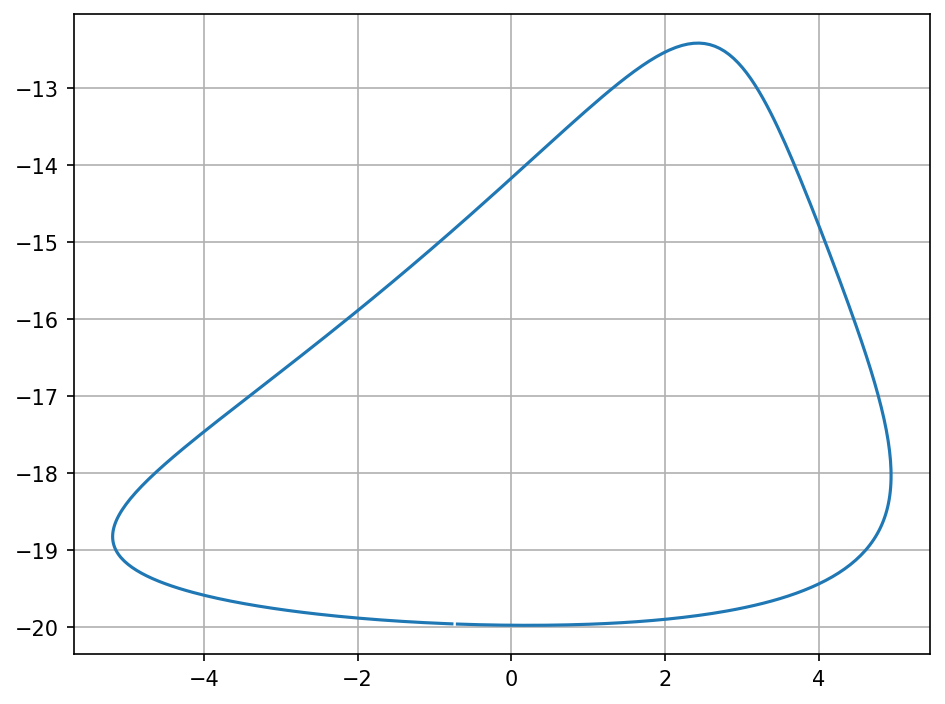

In [8]:
# coupler curve
jl = jansenLinkage(links=links, tn=tn)
p7 = []
plt.grid("on")
for i in range(360):
    pos, _, _ , _ = jl.kinematic_analysis(tm=i*np.pi/180)
    p7.append([pos["px"], pos["py"]])

p7 = np.array(p7)
plt.plot(p7[:, 0], p7[:, 1])

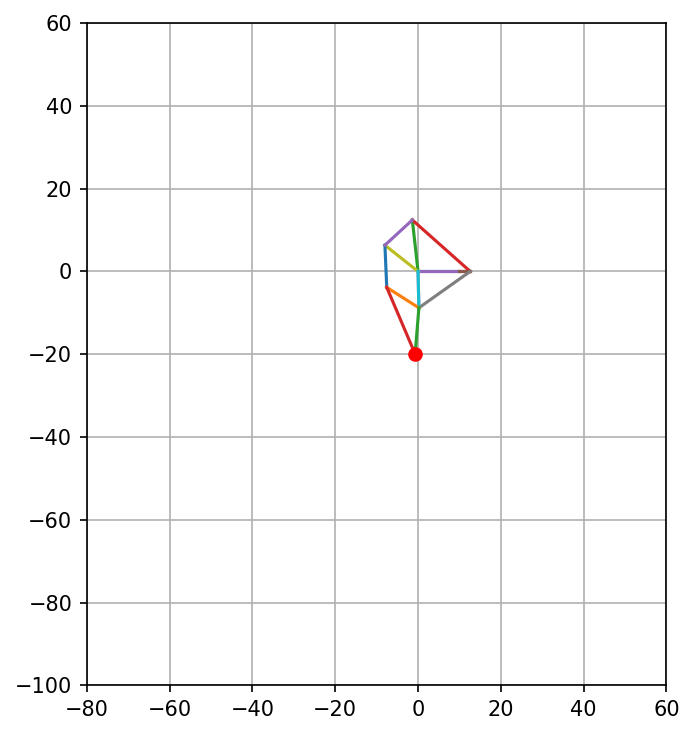

In [9]:
# Animation
jl = jansenLinkage(links=links, tn=tn)
jl.display(save = False)
jl.animation